In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3048,ham,Lol they don't know about my awesome phone. I ...,NaN,NaN,NaN
4806,spam,PRIVATE! Your 2004 Account Statement for 07849...,NaN,NaN,NaN
1848,ham,I dont want to hear philosophy. Just say what ...,NaN,NaN,NaN
609,ham,"It's fine, imma get a drink or somethin. Want ...",NaN,NaN,NaN
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN


In [4]:
df.shape
#we got 5572 msg with 5 column with null values

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Steps:
1. Data cleaning 
2. EDA
3. text preprocessing 
4. Model building 
5. Evaluation 
6. Improvement 
7. website
8. deployment

## 1. Data cleaning

In [6]:
#drop last three column as they are containing null values
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#rename the column name to meaningful name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#convert target variable to number - as machine is capable to understand values in numeric format

# we are using label encoder here as we have only 2 category in target column(ham/spam) which can be easily converted
#into 0 and 1

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Now finding the missing value in dataframe
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#Find the duplicate value in dataframe
df.duplicated().sum()

403

In [16]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#lets find the distribution of target values
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

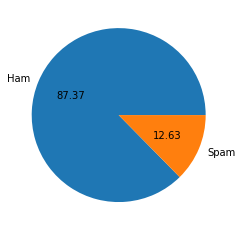

In [21]:
#lets visualize it in pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

# so our data is imbalanced

In [22]:
#NLTK is a leading platform for building Python programs to work with human language data.
#To install NLTK use !pip install nltk in cmd
import nltk


In [23]:
nltk.download('punkt')
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model
#for abbreviation words, collocations, and words that start sentences.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rupeshv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df.head(1)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."


In [25]:
#count no of char in text data for each rows
(df['text']).apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
#let add no of char in main dataframe
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#Find no of words in dataframe using NLTK - word_tokenize and add in dataframe
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#Find no of sentences in dataframe using NLTK - sent_tokenize and add in dataframe
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#Find the descriptive statistical summary when sms is ham

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#Find the descriptive statistical summary when sms is spam

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### By checking above values, we can say that avg length of (character/words/sentences) are more in spam message as compared to Ham.
### we can see outliers in ham messages

### Important Visualization 

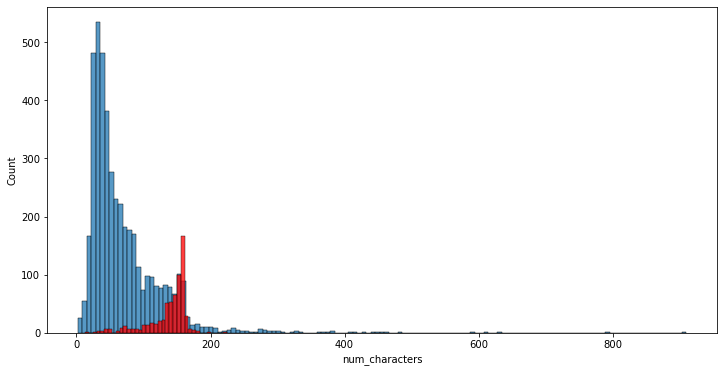

In [35]:
import seaborn as sns

# do visulization for num_chars for Ham and Spam

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

In [36]:
# do visulization for num_words for Ham and Spam

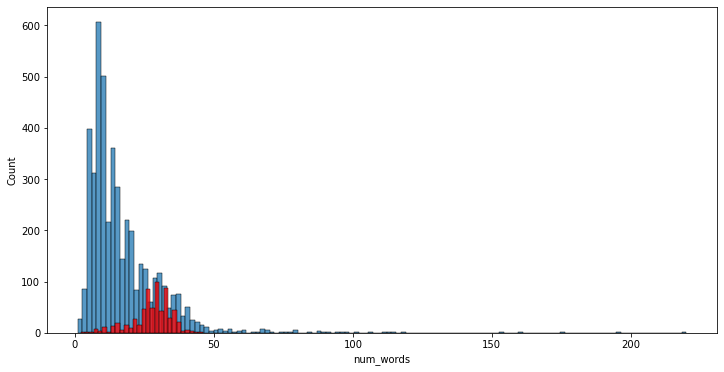

In [37]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target']==0]['num_words'],)
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

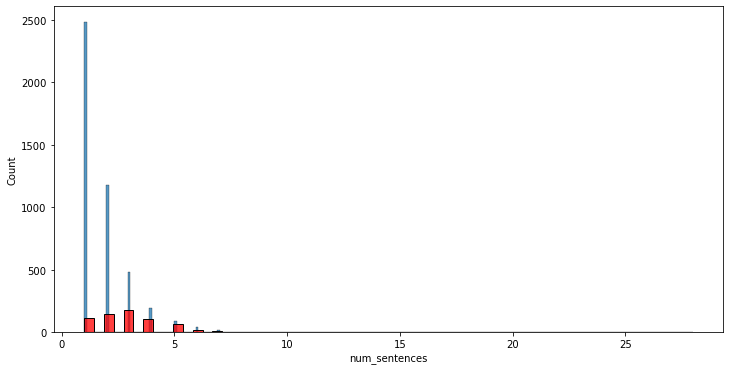

In [38]:
# do visulization for num_sentences for Ham and Spam
plt.figure(figsize=(12,6))

sns.histplot(df[df['target']==0]['num_sentences'],)
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

<Figure size 720x576 with 0 Axes>

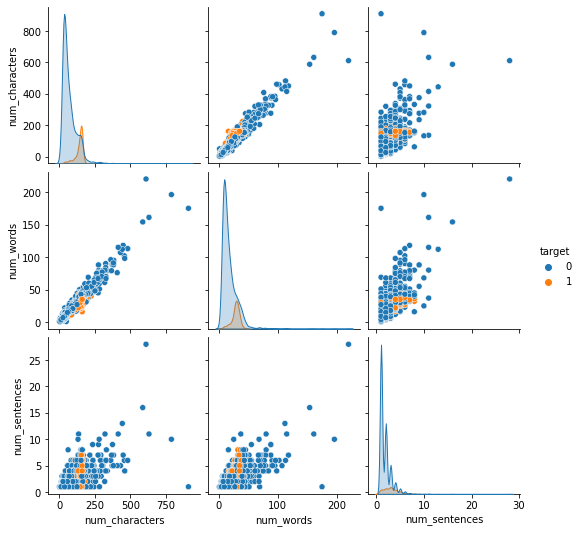

In [179]:
#plot pair plot to see dependency b/w variables and target values

plt.figure(figsize=(10,8))
sns.pairplot(df,hue='target')
plt.show()

<AxesSubplot:>

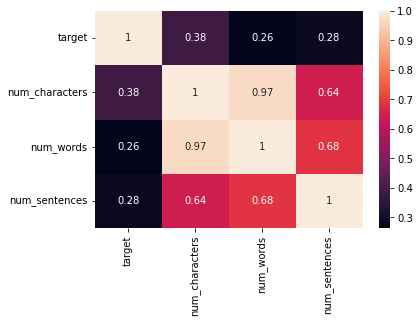

In [40]:
#lets further check the heatmap to correlation b/w all variables
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
import nltk
#way to include stopwords which will use in function 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('ENGLISH')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rupeshv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
from nltk.stem.porter import PorterStemmer
#way to include stem which will use in function 
ps=PorterStemmer()
ps.stem('standalsone')

'standalson'

In [44]:
import string
#way to include punctuation which will use in function 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Our Preprocessing Function 


In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [180]:
#testing of above funcion 
transform_text('how are you and how you are doing, come at home for dancing, i loved you since past ?')

'come home danc love sinc past'

In [181]:
transform_text('Did you like my words on ML presentation?')

'like word ml present'

In [48]:
#apply our function to all our text messages and stored in dataframe
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


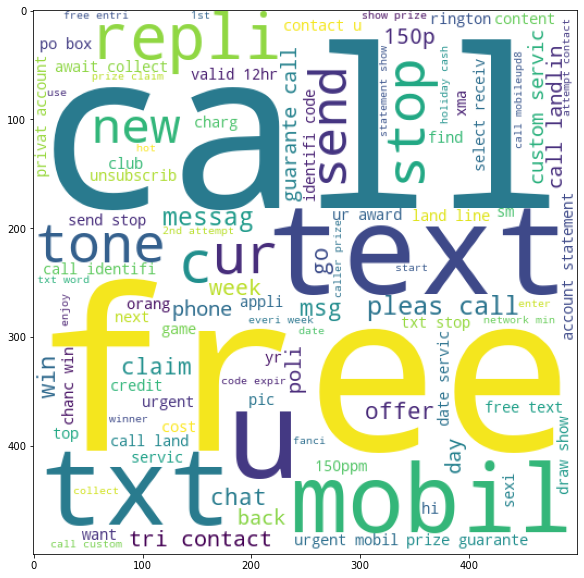

In [51]:
#!pip install wordcloud
# let see the wordcloud if messages are spam
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

                      
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

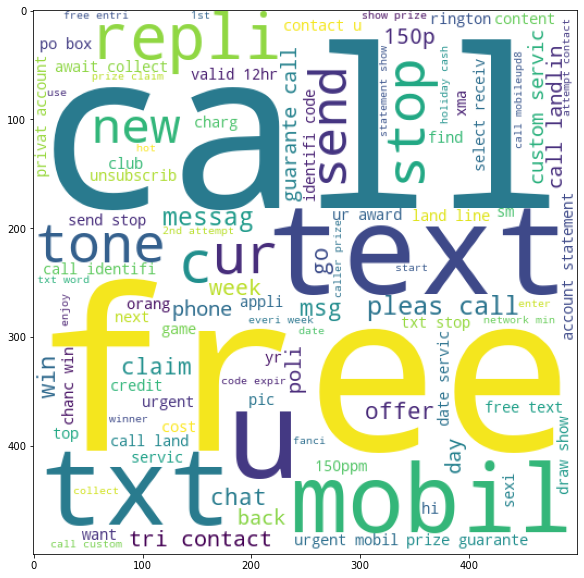

In [182]:
from wordcloud import WordCloud
# let see the wordcloud if messages are Ham

wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

                      
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

In [53]:
#find all words in spam messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():

spam_corpus
       

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [54]:
#length of spam words
len(spam_corpus) 

9939

In [55]:
#convert all words in key value pair - it is showing how much time the word is repeated.
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [56]:
#fitler top 30 spam words
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\rupeshv\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


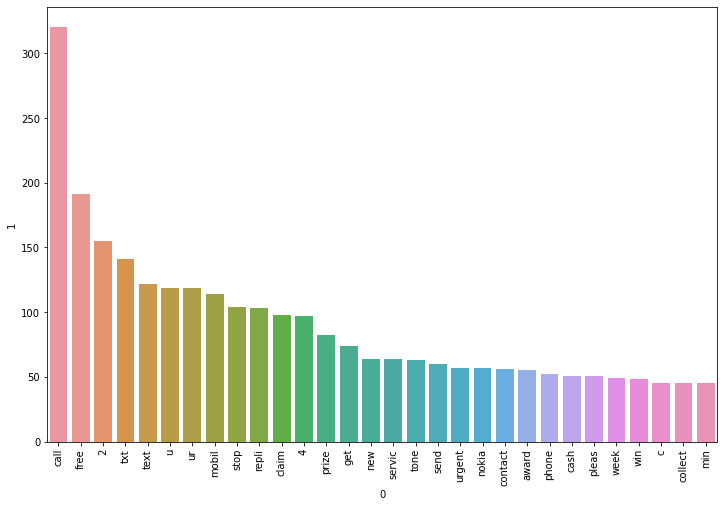

In [57]:
#see the count od top 30 words in spam messages
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')

plt.show()

In [58]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

ham_corpus
       

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [59]:
len(ham_corpus)

35394

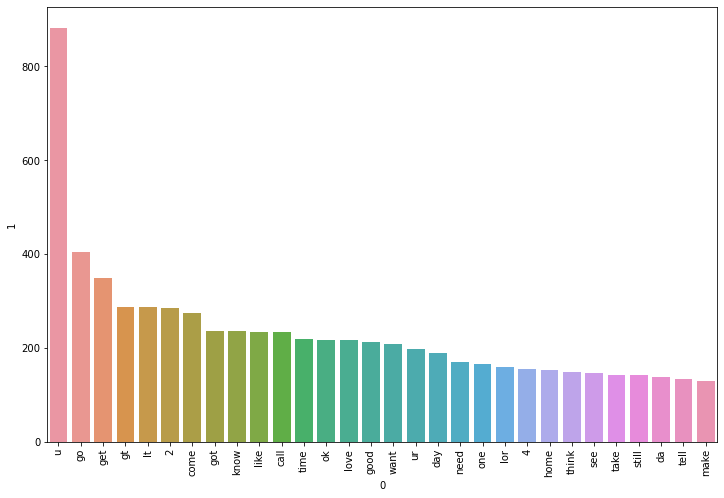

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')

plt.show()

# 4. Model Building 

## CountVectorizer

Scikit-learn's CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [62]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 6708)

In [64]:
y=df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
y.shape

(5169,)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## tfidfvectorizer 

Above model performancne can be further optimized. lets use TFIDF with max_features is equal to 3000, a
as it is working well here

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()

#now second time using max_features = 3000
tfidf=TfidfVectorizer(max_features=3000)


In [175]:
tfidf.fit_transform(df['transformed_text']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [171]:
X.shape

(5169, 3000)

In [113]:
y=df['target'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
y.shape

(5169,)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [176]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


### Here false positive count is zero and model is behaving very good and precision is also 1

In [118]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### so in tfidf - we see MNB is peforming better - with false positive rate to 0 - very good precision

In [83]:
#other different model

In [86]:
!pip install xgboost


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [121]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [122]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [178]:
train_classifier(mnb,X_train,X_test,y_train,y_test)

(0.9709864603481625, 1.0)

In [124]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,X_test,y_train,y_test)
    
    print("for ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

for  SVC
Accuracy -  0.9758220502901354
Precision - 0.9747899159663865
for  KN
Accuracy -  0.9052224371373307
Precision - 1.0
for  NB
Accuracy -  0.9709864603481625
Precision - 1.0
for  DT
Accuracy -  0.9294003868471954
Precision - 0.8282828282828283
for  LR
Accuracy -  0.9584139264990329
Precision - 0.9702970297029703
for  RF
Accuracy -  0.9748549323017408
Precision - 0.9827586206896551
for  AdaBoost
Accuracy -  0.960348162475822
Precision - 0.9292035398230089
for  BgC
Accuracy -  0.9574468085106383
Precision - 0.8671875
for  ETC
Accuracy -  0.9748549323017408
Precision - 0.9745762711864406
for  GBDT
Accuracy -  0.9477756286266924
Precision - 0.92
for  xgb
Accuracy -  0.971953578336557
Precision - 0.943089430894309


In [95]:
import pandas as pd

In [100]:
performance_df=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df.reset_index(drop='index')

,Algorithms,Accuracy,Precision
0,KN,0.900387,1.000000
1,NB,0.959381,1.000000
2,RF,0.973888,1.000000
3,ETC,0.975822,0.982906
4,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
6,LR,0.951644,0.940000
7,xgb,0.969052,0.934426
8,GBDT,0.952611,0.923810
9,BgC,0.958414,0.862595


In [107]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithms")


In [108]:
performance_df1

,Algorithms,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


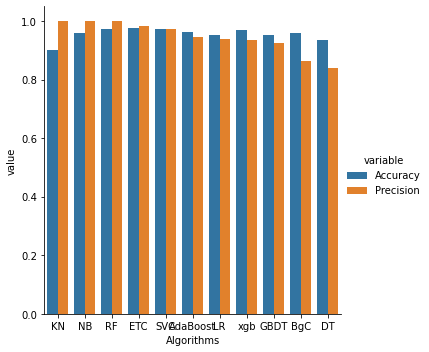

In [109]:
sns.catplot(x='Algorithms',y='value',data=performance_df1,kind='bar',hue='variable')

In [137]:
temp_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)



In [138]:
temp_df


,Algorithms,Accuracy_scaling,Precision_scaling
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [131]:
new_df = performance_df.merge(temp_df,on='Algorithms')


In [132]:
new_df

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


In [139]:
new_df_scaled = new_df.merge(temp_df,on='Algorithms')


In [158]:
new_df

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


In [141]:
# Voting Classifier combine multiple algo
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [142]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [159]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


## We have tried lot of classifer. but we can say MNB is performing better. so we will save the model here. so that there is no requirement to run it again and again

### we have used joblib and pickle. But joblib is easy to work as it is not involving file handling part. 

### This step was used to save the model and will used in deployment.

In [177]:
import joblib

joblib.dump(mnb, 'model1.pkl')
joblib.dump(tfidf,'vectorizer1.pkl')


['vectorizer1.pkl']

In [162]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [160]:
pd.read_pickle('model.pkl')

MultinomialNB()

In [149]:
pd.read_pickle('vectorizer.pkl')

TfidfVectorizer(max_features=3000)

In [148]:
pd.read_pickle('nitish_trainer_files/model.pkl')

MultinomialNB()

In [157]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.0.2.


### Our jupyter notebook version will match with our project venv version in pycharm